In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
gym_data = pd.read_csv('gym_members_exercise_tracking.csv')

In [5]:
gym_data.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [7]:
#Check different columns
gym_data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [9]:
#check the number of rows and columns
gym_data.shape

(973, 15)

In [11]:
#Get the detailed info of the Gym_data
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [13]:
#Check for Null values
gym_data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [15]:
#check for unique values in each column
gym_data.nunique()

Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           40
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         147
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              771
dtype: int64

In [17]:
gym_data.describe().transpose().style.background_gradient(cmap = 'BuPu')

In [21]:
#Calculate the average & median Age
mean_age = gym_data['Age'].mean().round(2)
median_age = gym_data['Age'].median()

print(f"The Mean Age: {mean_age}")
print(f"The Median Age: {median_age}")

The Mean Age: 38.68
The Median Age: 40.0


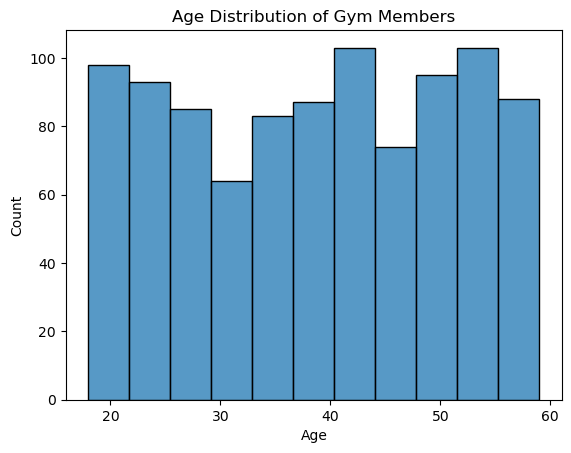

In [23]:
#Distribution of Age Group
sns.histplot(data=gym_data, x='Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Gym Members')
plt.show()

In [25]:
#Calculating the Average Wight, Height & BMI of Members
mean_weight = gym_data['Weight (kg)'].mean().round(2)
mean_height = gym_data['Height (m)'].mean().round(2)
mean_BMI = gym_data['BMI'].mean().round(2)

print(f"The Average Weight (kg): {mean_weight}")
print(f"The Average Height (m): {mean_height}")
print(f"The Average BMI: {mean_BMI}")

The Average Weight (kg): 73.85
The Average Height (m): 1.72
The Average BMI: 24.91


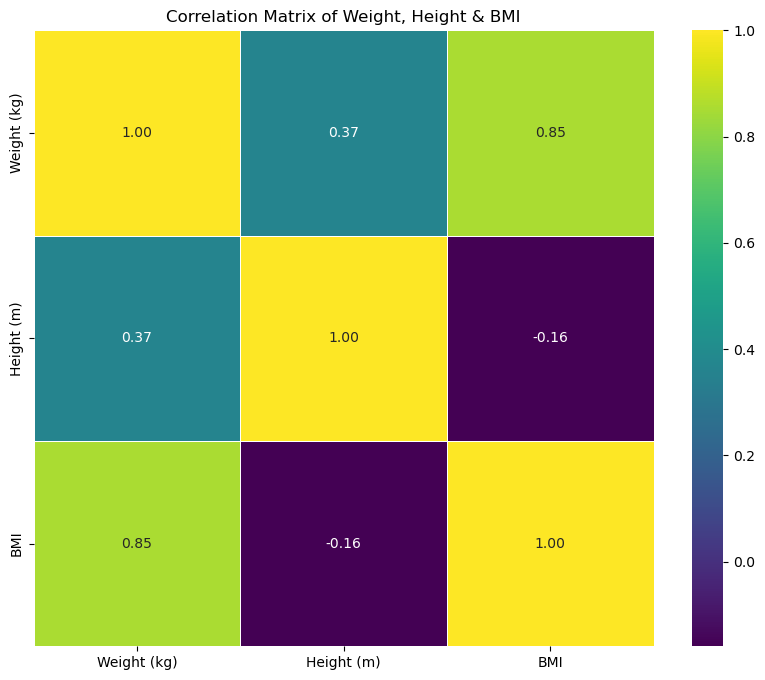

In [27]:
#Correlatin between Weight, Height & BMI
weig_hei_BMI_corr = gym_data[['Weight (kg)','Height (m)','BMI']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(weig_hei_BMI_corr,annot = True,cmap='viridis',linewidths=0.5,fmt=".2f")
plt.title('Correlation Matrix of Weight, Height & BMI')
plt.show()

Correlation between Fat Percentage and BMI: -0.12


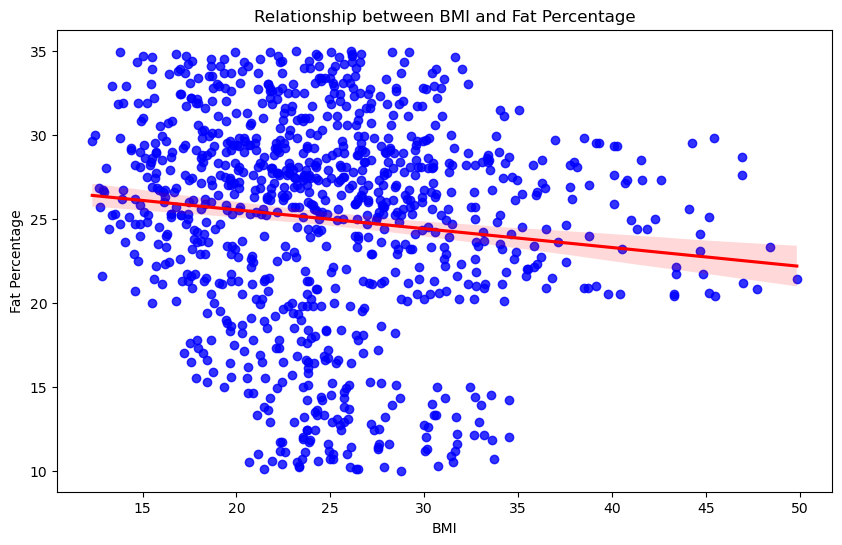

In [29]:
#Relationship between BMI and Fat Percentage
fat_bmi_corr = gym_data[['Fat_Percentage', 'BMI']].corr().loc['Fat_Percentage', 'BMI']
print(f"Correlation between Fat Percentage and BMI: {fat_bmi_corr:.2f}")

plt.figure(figsize=(10,6))
sns.regplot(data = gym_data, x = 'BMI', y = 'Fat_Percentage', scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Relationship between BMI and Fat Percentage')
plt.xlabel('BMI')
plt.ylabel('Fat Percentage')
plt.show()

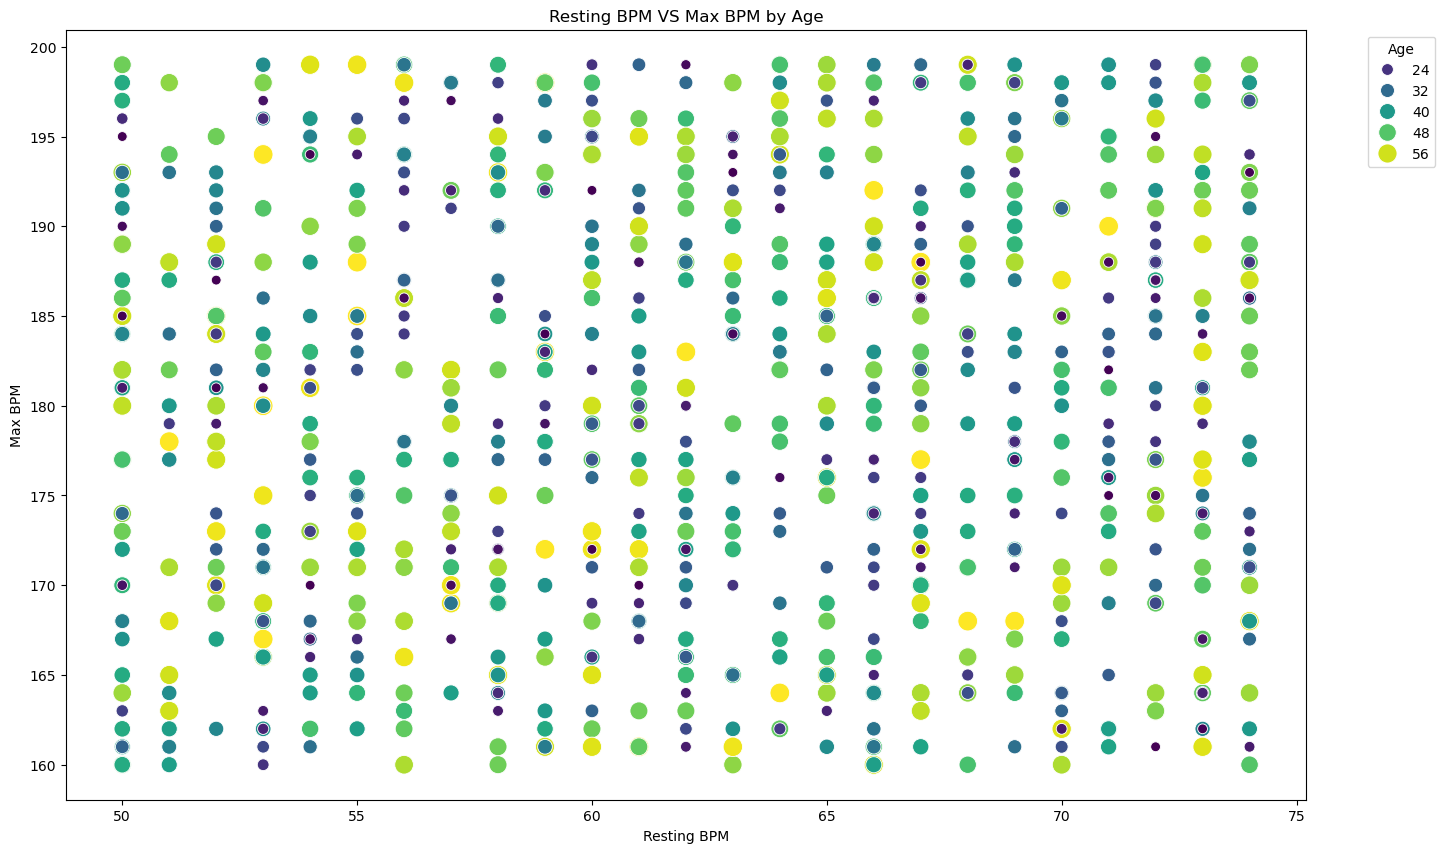

In [37]:
#relationship between resting heart rate and max heart rate during workouts by Age
plt.figure(figsize=(16,10))
sns.scatterplot(data = gym_data,x = 'Resting_BPM', y = 'Max_BPM', hue = 'Age',palette = 'viridis',size = 'Age',sizes=(50, 200))
plt.title('Resting BPM VS Max BPM by Age')
plt.xlabel('Resting BPM')
plt.ylabel('Max BPM')
plt.legend(title='Age',loc='upper right',bbox_to_anchor=(1.11, 1))
plt.show()

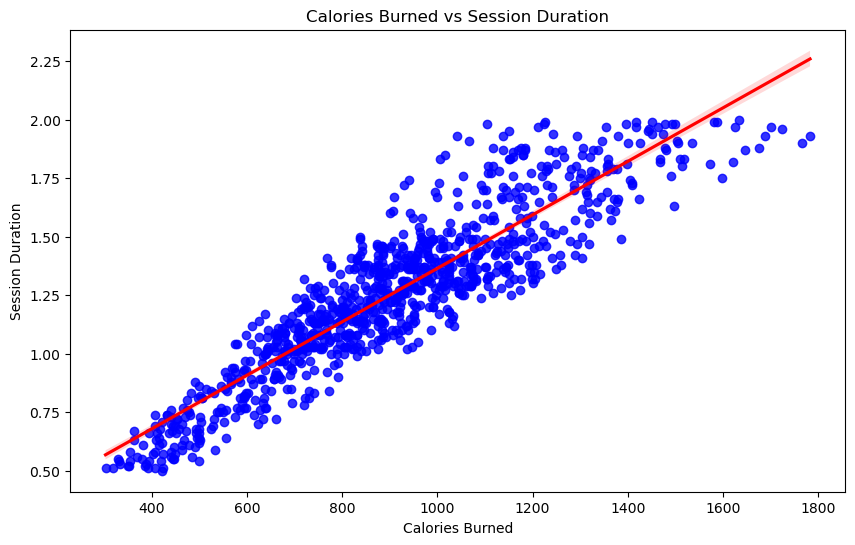

In [39]:
#Calories Burned vs. Session Duration (To check if longer sessions lead to more calories burned)
plt.figure(figsize=(10,6))
sns.regplot(data = gym_data, x = 'Calories_Burned', y = 'Session_Duration (hours)',scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Calories Burned vs Session Duration')
plt.xlabel('Calories Burned')
plt.ylabel('Session Duration')
plt.show()

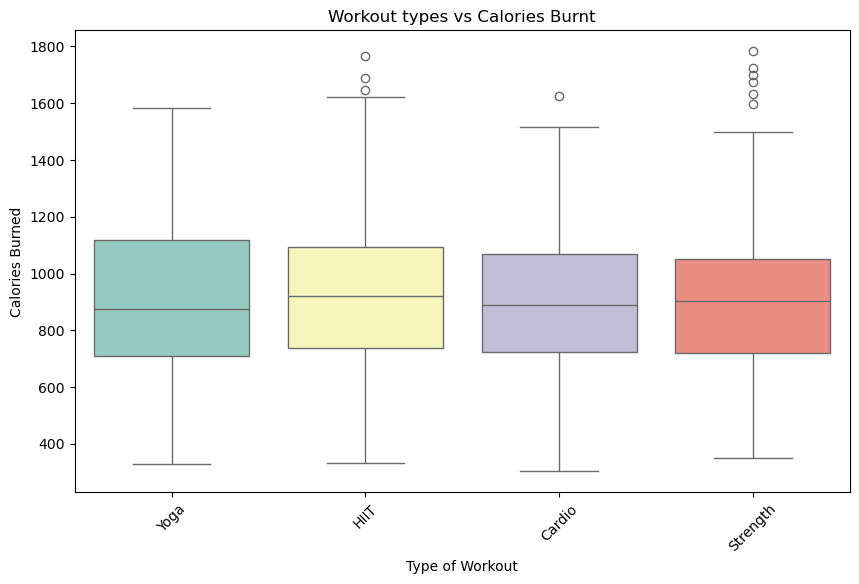

In [41]:
#Workout types vs Calories Burnt
plt.figure(figsize=(10,6))
sns.boxplot(data = gym_data, x = 'Workout_Type', y = 'Calories_Burned', hue='Workout_Type',palette = 'Set3')
plt.title('Workout types vs Calories Burnt')
plt.xlabel('Type of Workout')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

C:\Users\ashua\AppData\Local\Temp\ipykernel_7960\718194040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = gym_data.assign(Age_Group = pd.cut(gym_data['Age'], bins =[0,18,30,40,50,60,100],labels=['0-18','19-30','31-40','41-50','51-60','61-100'])),


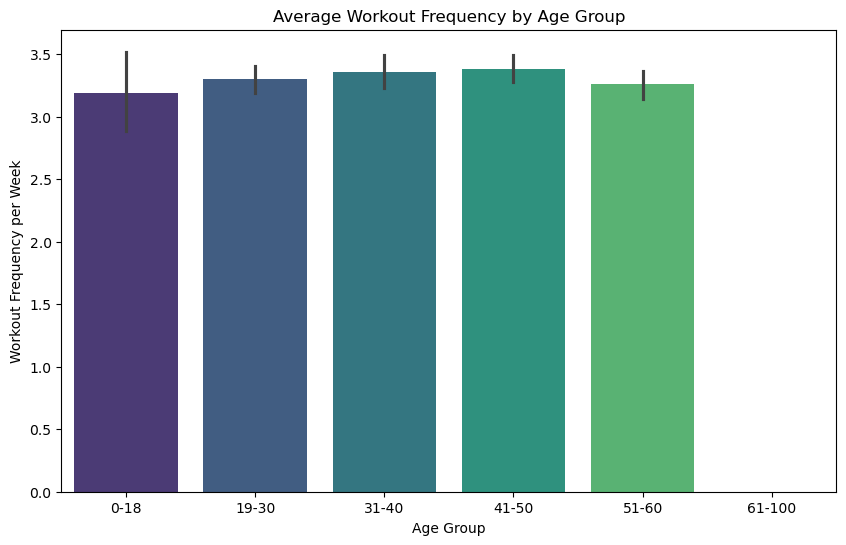

In [43]:
#Age vs Workout Frequency
plt.figure(figsize=(10,6))
sns.barplot(data = gym_data.assign(Age_Group = pd.cut(gym_data['Age'], bins =[0,18,30,40,50,60,100],labels=['0-18','19-30','31-40','41-50','51-60','61-100'])),
           x= 'Age_Group', y = 'Workout_Frequency (days/week)',palette = 'viridis')
plt.title('Average Workout Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Workout Frequency per Week')
plt.show()

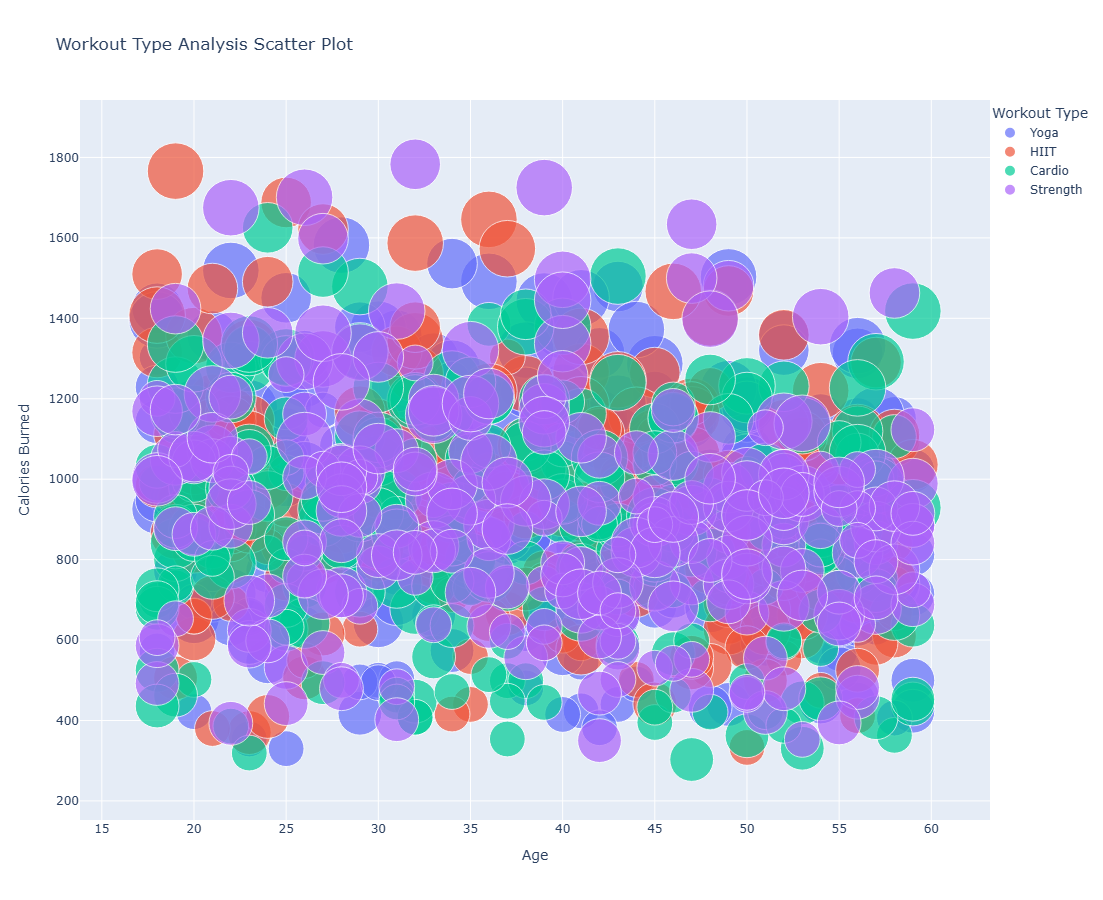

In [45]:
# Gender Analysis
fig = px.scatter(
    gym_data, 
    x='Age', 
    y='Calories_Burned', 
    color='Workout_Type',
    size='Workout_Frequency (days/week)', 
    color_continuous_scale='coolwarm',
    size_max=40,
    title='Workout Type Analysis Scatter Plot')
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Calories Burned',
    legend=dict(title='Workout Type', x=1, y=1),width=1000,height=900)
fig.show()

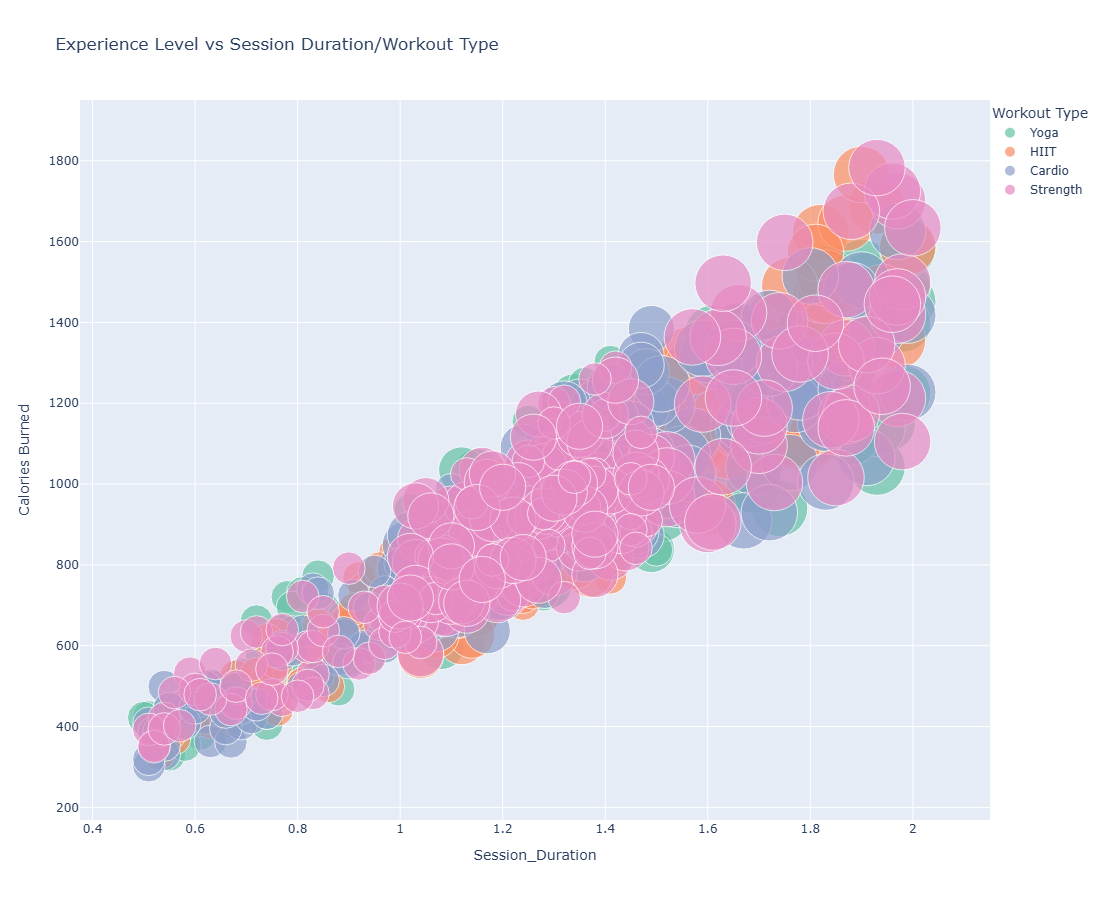

In [47]:
# Experience Level vs Session Duration/Workout Type
fig = px.scatter(
    gym_data,
    x = 'Session_Duration (hours)',
    y = 'Calories_Burned',
    color = 'Workout_Type',
    size = 'Experience_Level',
    color_discrete_sequence=px.colors.qualitative.Set2,
    size_max=40,
    title='Experience Level vs Session Duration/Workout Type'
)
fig.update_layout(
    xaxis_title='Session_Duration',
    yaxis_title='Calories Burned',
    legend=dict(title='Workout Type', x=1, y=1),width=1000,height=900)
fig.show()

In [49]:
experience_map = {1:'Beinner',2:'Intermediate',3:'Expert'}
gym_data['Experience_Category'] = gym_data['Experience_Level'].map(experience_map)

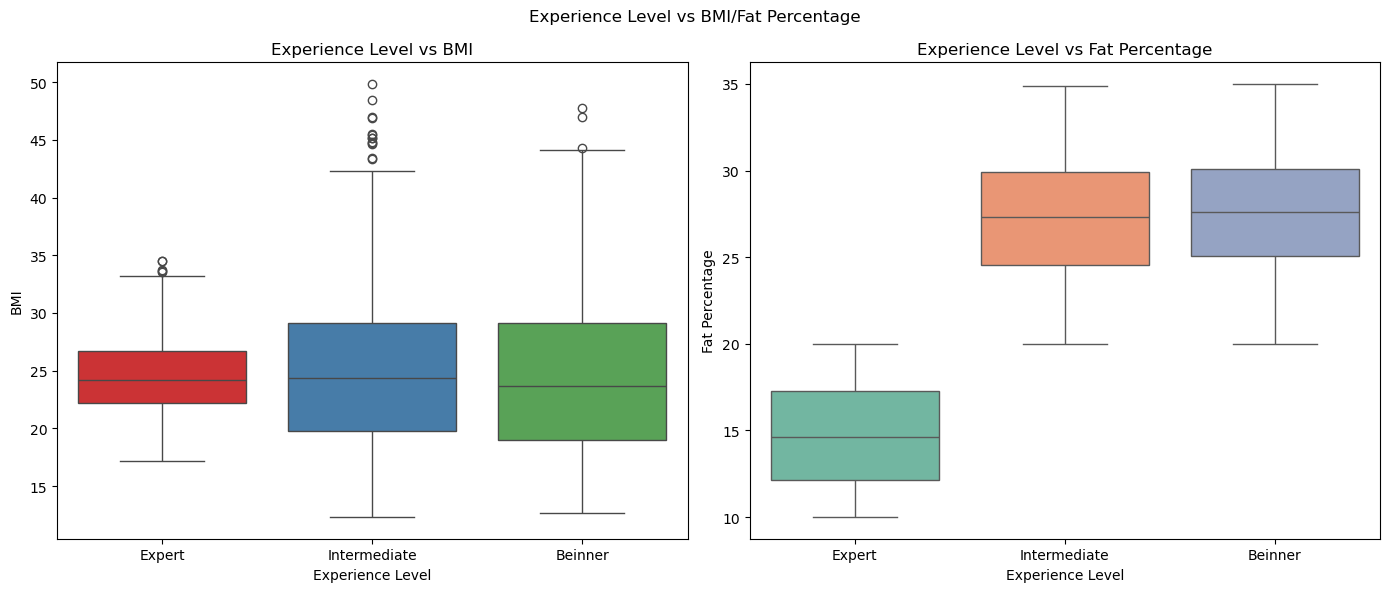

In [51]:
#Experience Level vs BMI/Fat Percentage
fig, axes = plt.subplots(1,2,figsize=(14,6))
#Experience Level vs BMI
sns.boxplot(data = gym_data, x = 'Experience_Category', y = 'BMI',hue='Experience_Category',ax = axes[0],palette='Set1')
axes[0].set_title('Experience Level vs BMI')
axes[0].set_xlabel('Experience Level')
axes[0].set_ylabel('BMI')

#Experience Level VS Fat Percentage
sns.boxplot(data = gym_data, x = 'Experience_Category', y = 'Fat_Percentage',hue='Experience_Category',ax = axes[1],palette='Set2')
axes[1].set_title('Experience Level vs Fat Percentage')
axes[1].set_xlabel('Experience Level')
axes[1].set_ylabel('Fat Percentage')

fig.suptitle('Experience Level vs BMI/Fat Percentage')
plt.tight_layout()
plt.show()

In [53]:
# Correlation between BMI & Fat Percentage
bmi_fatperc = gym_data[['BMI','Fat_Percentage']].corr()
bmi_fatperc

BMI  Fat_Percentage
BMI             1.000000       -0.119258
Fat_Percentage -0.119258        1.000000

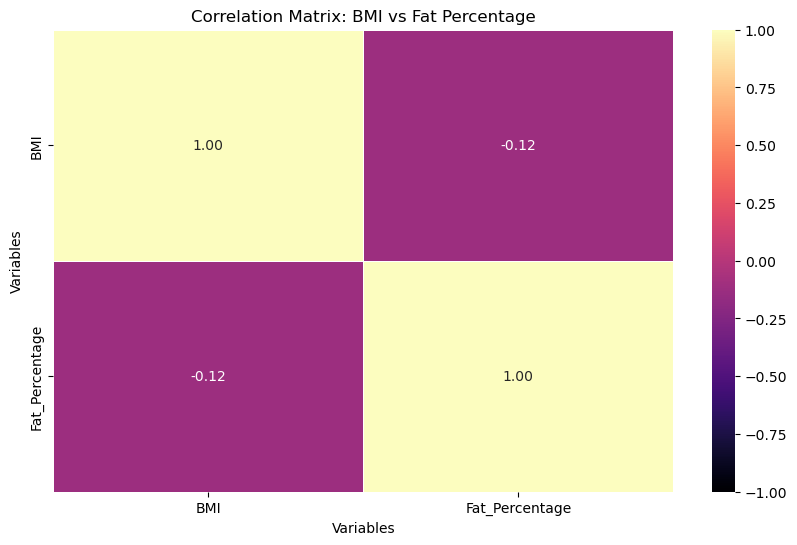

In [55]:
#Heatmap (Correlation Matrix: BMI vs Fat Percentage)
plt.figure(figsize=(10,6))

sns.heatmap(data = bmi_fatperc,annot = True,cmap='magma',linewidths=0.5,fmt=".2f",vmin=-1, vmax=1)
plt.title('Correlation Matrix: BMI vs Fat Percentage')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

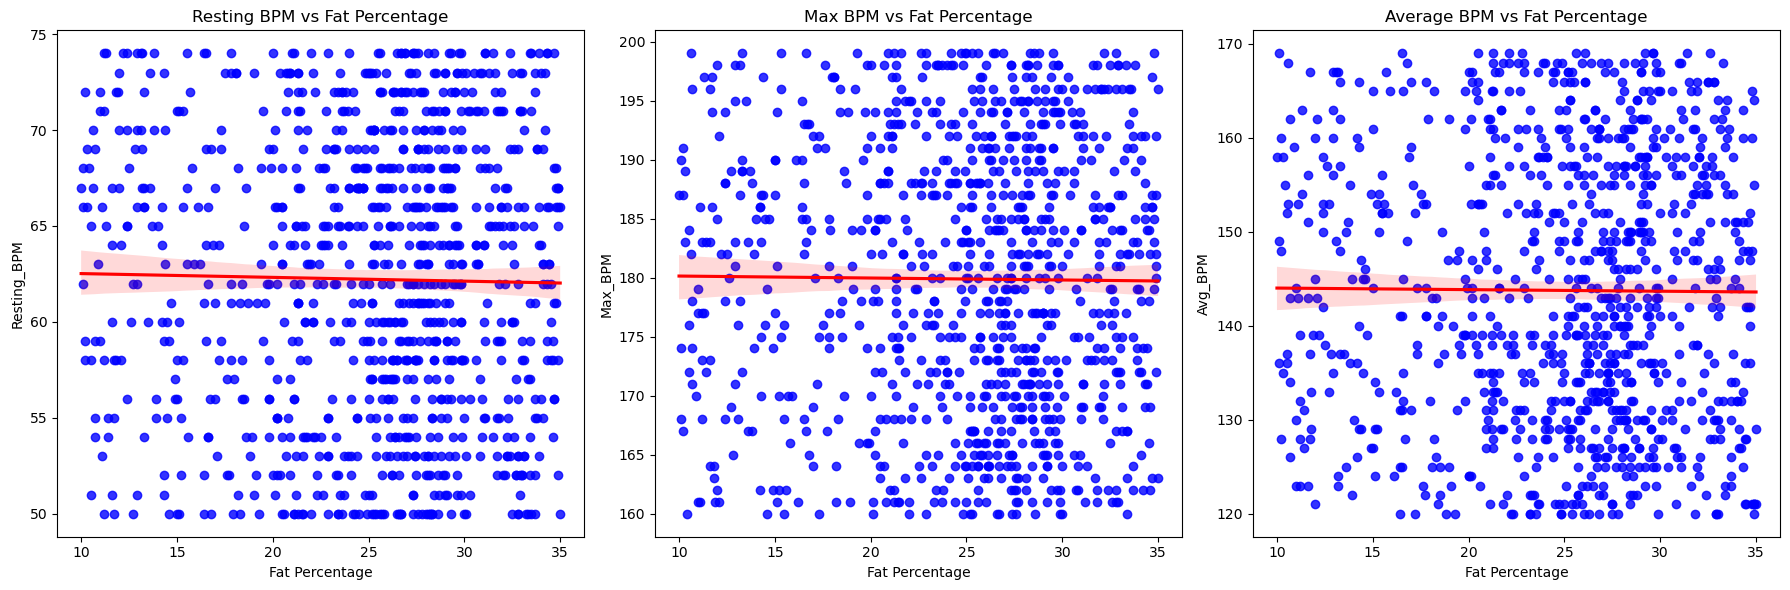

In [57]:
#Heart Rate vs Fat Percentage
fig, axes = plt.subplots(1,3,figsize=(18,6))

metrics = ['Resting_BPM','Max_BPM','Avg_BPM']
titles = ['Resting BPM vs Fat Percentage','Max BPM vs Fat Percentage','Average BPM vs Fat Percentage']

for i, metric in enumerate(metrics):
    sns.regplot(
        data = gym_data,
        x = 'Fat_Percentage',
        y = metric,
        ax = axes[i],
        color = 'blue',
        line_kws={'color':'red'}
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Fat Percentage')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

C:\Users\ashua\AppData\Local\Temp\ipykernel_7960\2491992576.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




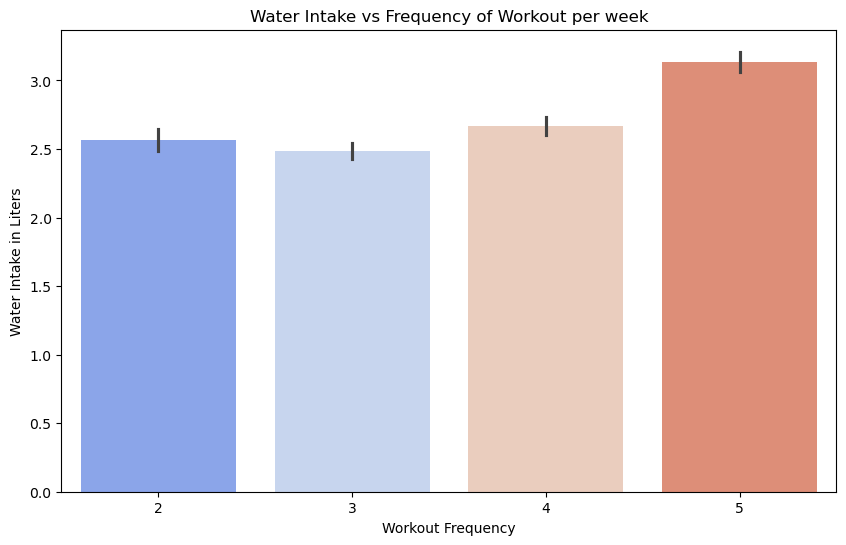

In [59]:
#Water Intake vs Workout Frequency
plt.figure(figsize=(10,6))

sns.barplot(data = gym_data, x = 'Workout_Frequency (days/week)',y = 'Water_Intake (liters)',palette='coolwarm')
plt.title('Water Intake vs Frequency of Workout per week')
plt.xlabel('Workout Frequency')
plt.ylabel('Water Intake in Liters')
plt.show()